In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
dataset = pd.read_csv("shop_nordstrom_com.csv")

In [3]:
dataset.head()

,mrp,price,product_category,rating,review_count,silicone,cotton,nylon,modal,polyester,spandex,elastane,rayon,viscose,polyurethane,metallic fibers,Classe
0,23,23.0,Sexy Lingerie,0.0,0,0,0,77,0,5,18,0,0,0,0,0,1
1,78,78.0,Sexy Lingerie,0.0,0,0,0,80,0,0,20,0,0,0,0,0,0
2,15,15.0,Skin-Tone Lingerie,4.3,33,0,0,93,0,0,7,0,0,0,0,0,1
3,20,20.0,Panties,0.0,0,0,0,88,0,0,12,0,0,0,0,0,1
4,29,29.0,Bras,0.0,0,0,0,91,0,0,9,0,0,0,0,0,1


In [4]:
dataset.shape

(5232, 17)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mrp               5232 non-null   int64  
 1   price             5232 non-null   float64
 2   product_category  5232 non-null   object 
 3   rating            5232 non-null   float64
 4   review_count      5232 non-null   int64  
 5   silicone          5232 non-null   int64  
 6   cotton            5232 non-null   int64  
 7   nylon             5232 non-null   int64  
 8   modal             5232 non-null   int64  
 9   polyester         5232 non-null   int64  
 10  spandex           5232 non-null   int64  
 11  elastane          5232 non-null   int64  
 12  rayon             5232 non-null   int64  
 13  viscose           5232 non-null   int64  
 14  polyurethane      5232 non-null   int64  
 15  metallic fibers   5232 non-null   int64  
 16  Classe            5232 non-null   int64  


In [6]:
dataset.isnull().sum()

mrp                 0
price               0
product_category    0
rating              0
review_count        0
silicone            0
cotton              0
nylon               0
modal               0
polyester           0
spandex             0
elastane            0
rayon               0
viscose             0
polyurethane        0
metallic fibers     0
Classe              0
dtype: int64

In [7]:
dataset['Classe'].value_counts()

1    3364
0    1868
Name: Classe, dtype: int64

In [8]:
dataset.nunique()

mrp                 63
price               95
product_category     5
rating              23
review_count        75
silicone             3
cotton              13
nylon               46
modal                5
polyester           18
spandex             37
elastane            19
rayon                8
viscose              2
polyurethane         2
metallic fibers      2
Classe               2
dtype: int64

# Analyse et visualisation des données

In [9]:
def data_graph (axis, width, height):
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    for p in axis.patches: 
        axis.annotate ("{0:.1f}".format(p.get_height()), (p.get_x()+width, p.get_height()+height))

Text(0.5, 1.0, 'Distribution des classes')

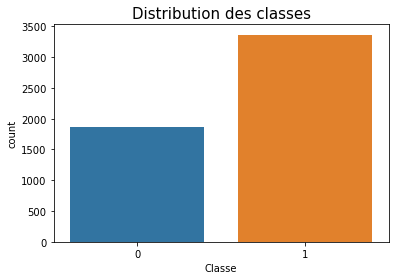

In [10]:
sns.countplot(x=dataset.Classe).set_title('Distribution des classes', size=15)

In [11]:
data0 = dataset.groupby('Classe')["rating","review_count"].sum().reset_index()
data0.head()

<ipython-input-11-28d352319dbb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data0 = dataset.groupby('Classe')["rating","review_count"].sum().reset_index()


,Classe,rating,review_count
0,0,4385.3,89664
1,1,9285.8,62007


In [12]:
data1=data0[["Classe","review_count"]]
data1.head()

,Classe,review_count
0,0,89664
1,1,62007


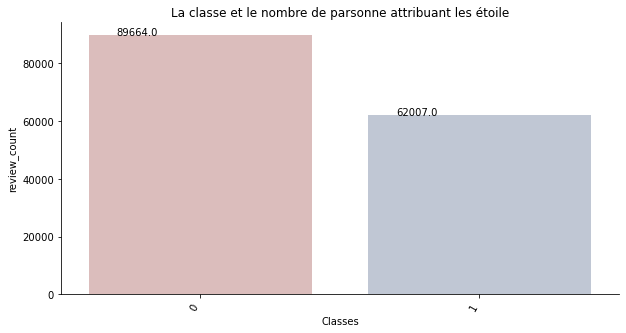

In [13]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Classe", y="review_count", data=data1, palette="vlag_r")
plt.title("La classe et le nombre de parsonne attribuant les étoile")
plt.xticks(rotation=60, ha='right')
plt.xlabel("Classes")
plt.ylabel("review_count")
data_graph(ax, 0.1, 10)
plt.show()

In [14]:
data2=data0[["Classe","rating"]]
data2.head()

,Classe,rating
0,0,4385.3
1,1,9285.8


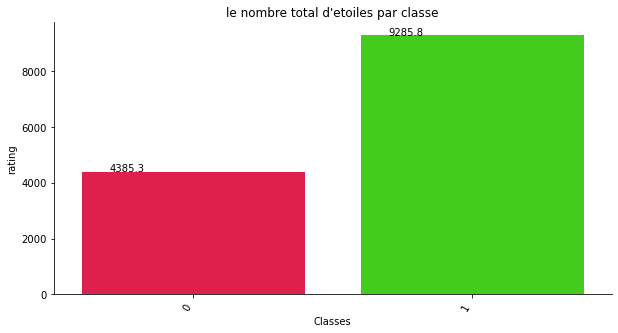

In [15]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Classe", y="rating", data=data2, palette='prism_r')
plt.title("le nombre total d'etoiles par classe")
plt.xticks(rotation=60, ha='right')
plt.xlabel("Classes")
plt.ylabel("rating")
data_graph(ax, 0.1, 10)
plt.show()

In [16]:
data3 = dataset.groupby('rating')["price","review_count"].sum().reset_index()
data3.head()

<ipython-input-16-71309b3e5b03>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data3 = dataset.groupby('rating')["price","review_count"].sum().reset_index()


,rating,price,review_count
0,0.0,81397.28,0
1,1.0,396.00,11
2,2.7,981.60,912
3,2.8,577.20,156
4,3.0,1422.60,225


In [17]:
data4=data3[["rating","review_count"]]
data4.head()

,rating,review_count
0,0.0,0
1,1.0,11
2,2.7,912
3,2.8,156
4,3.0,225


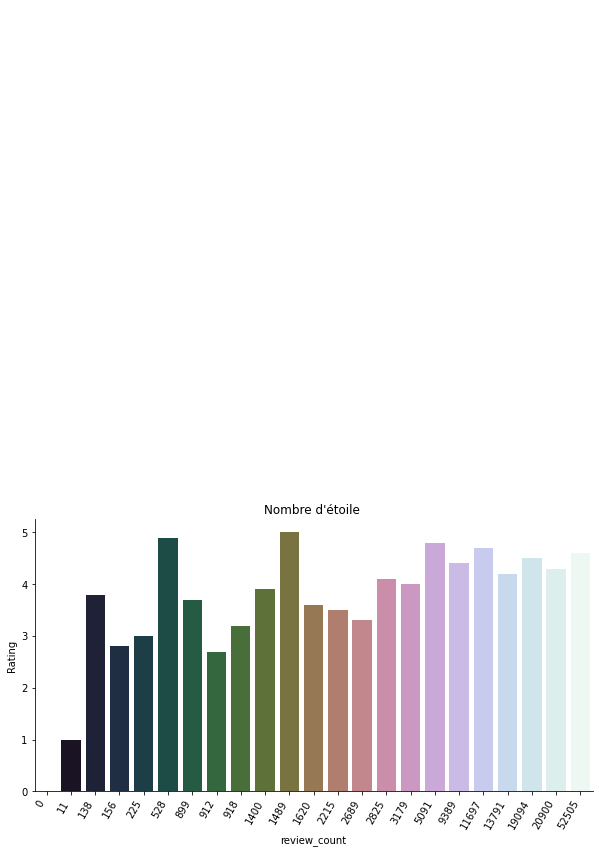

In [18]:
data5 = data4.sort_values("review_count", ascending=True)

plt.figure(figsize=(10,5))
ax = sns.barplot(x="review_count", y="rating", data=data5, palette="cubehelix")
plt.title("Nombre d'étoile ")
plt.xticks(rotation=60, ha='right')
plt.xlabel("review_count")
plt.ylabel("Rating")
data_graph(ax, 0.1, 10)
plt.show()

In [19]:
data6=data3[["rating","price"]]
data6.head()

,rating,price
0,0.0,81397.28
1,1.0,396.00
2,2.7,981.60
3,2.8,577.20
4,3.0,1422.60


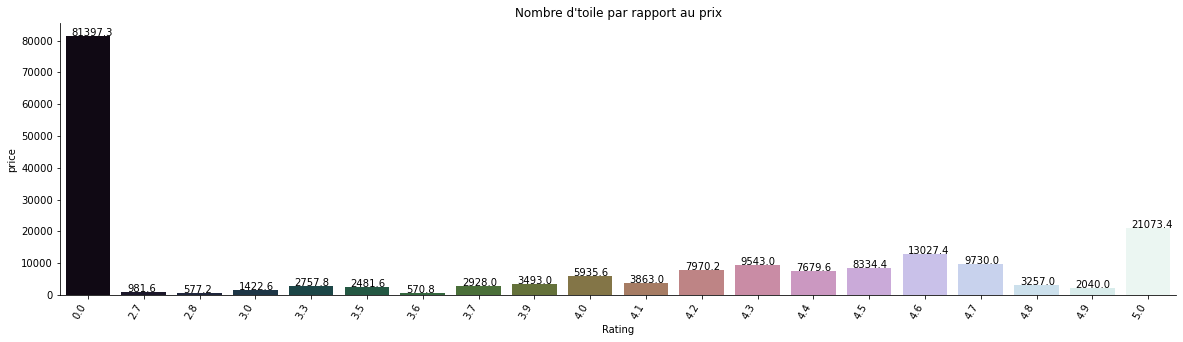

In [20]:
data7 = data6.sort_values("price", ascending=False)

plt.figure(figsize=(20,5))
ax = sns.barplot(x="rating", y="price", data=data7[ :20], palette="cubehelix")
plt.title("Nombre d'toile par rapport au prix")
plt.xticks(rotation=60, ha='right')
plt.xlabel("Rating")
plt.ylabel("price")
data_graph(ax, 0.1, 10)
plt.show()

<AxesSubplot:>

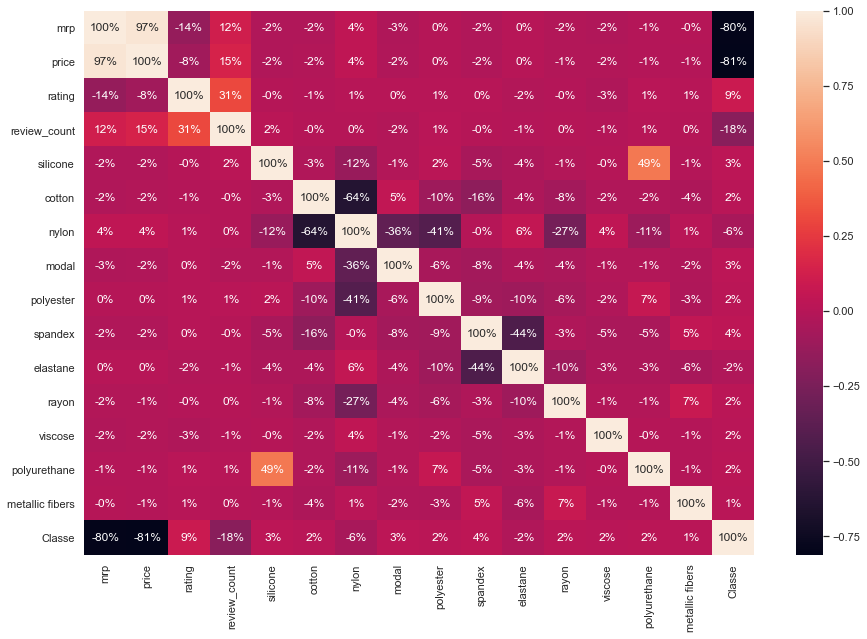

In [21]:
sns.set(rc={'figure.figsize': (15,10)})

corr = dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.0%')

In [22]:
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    

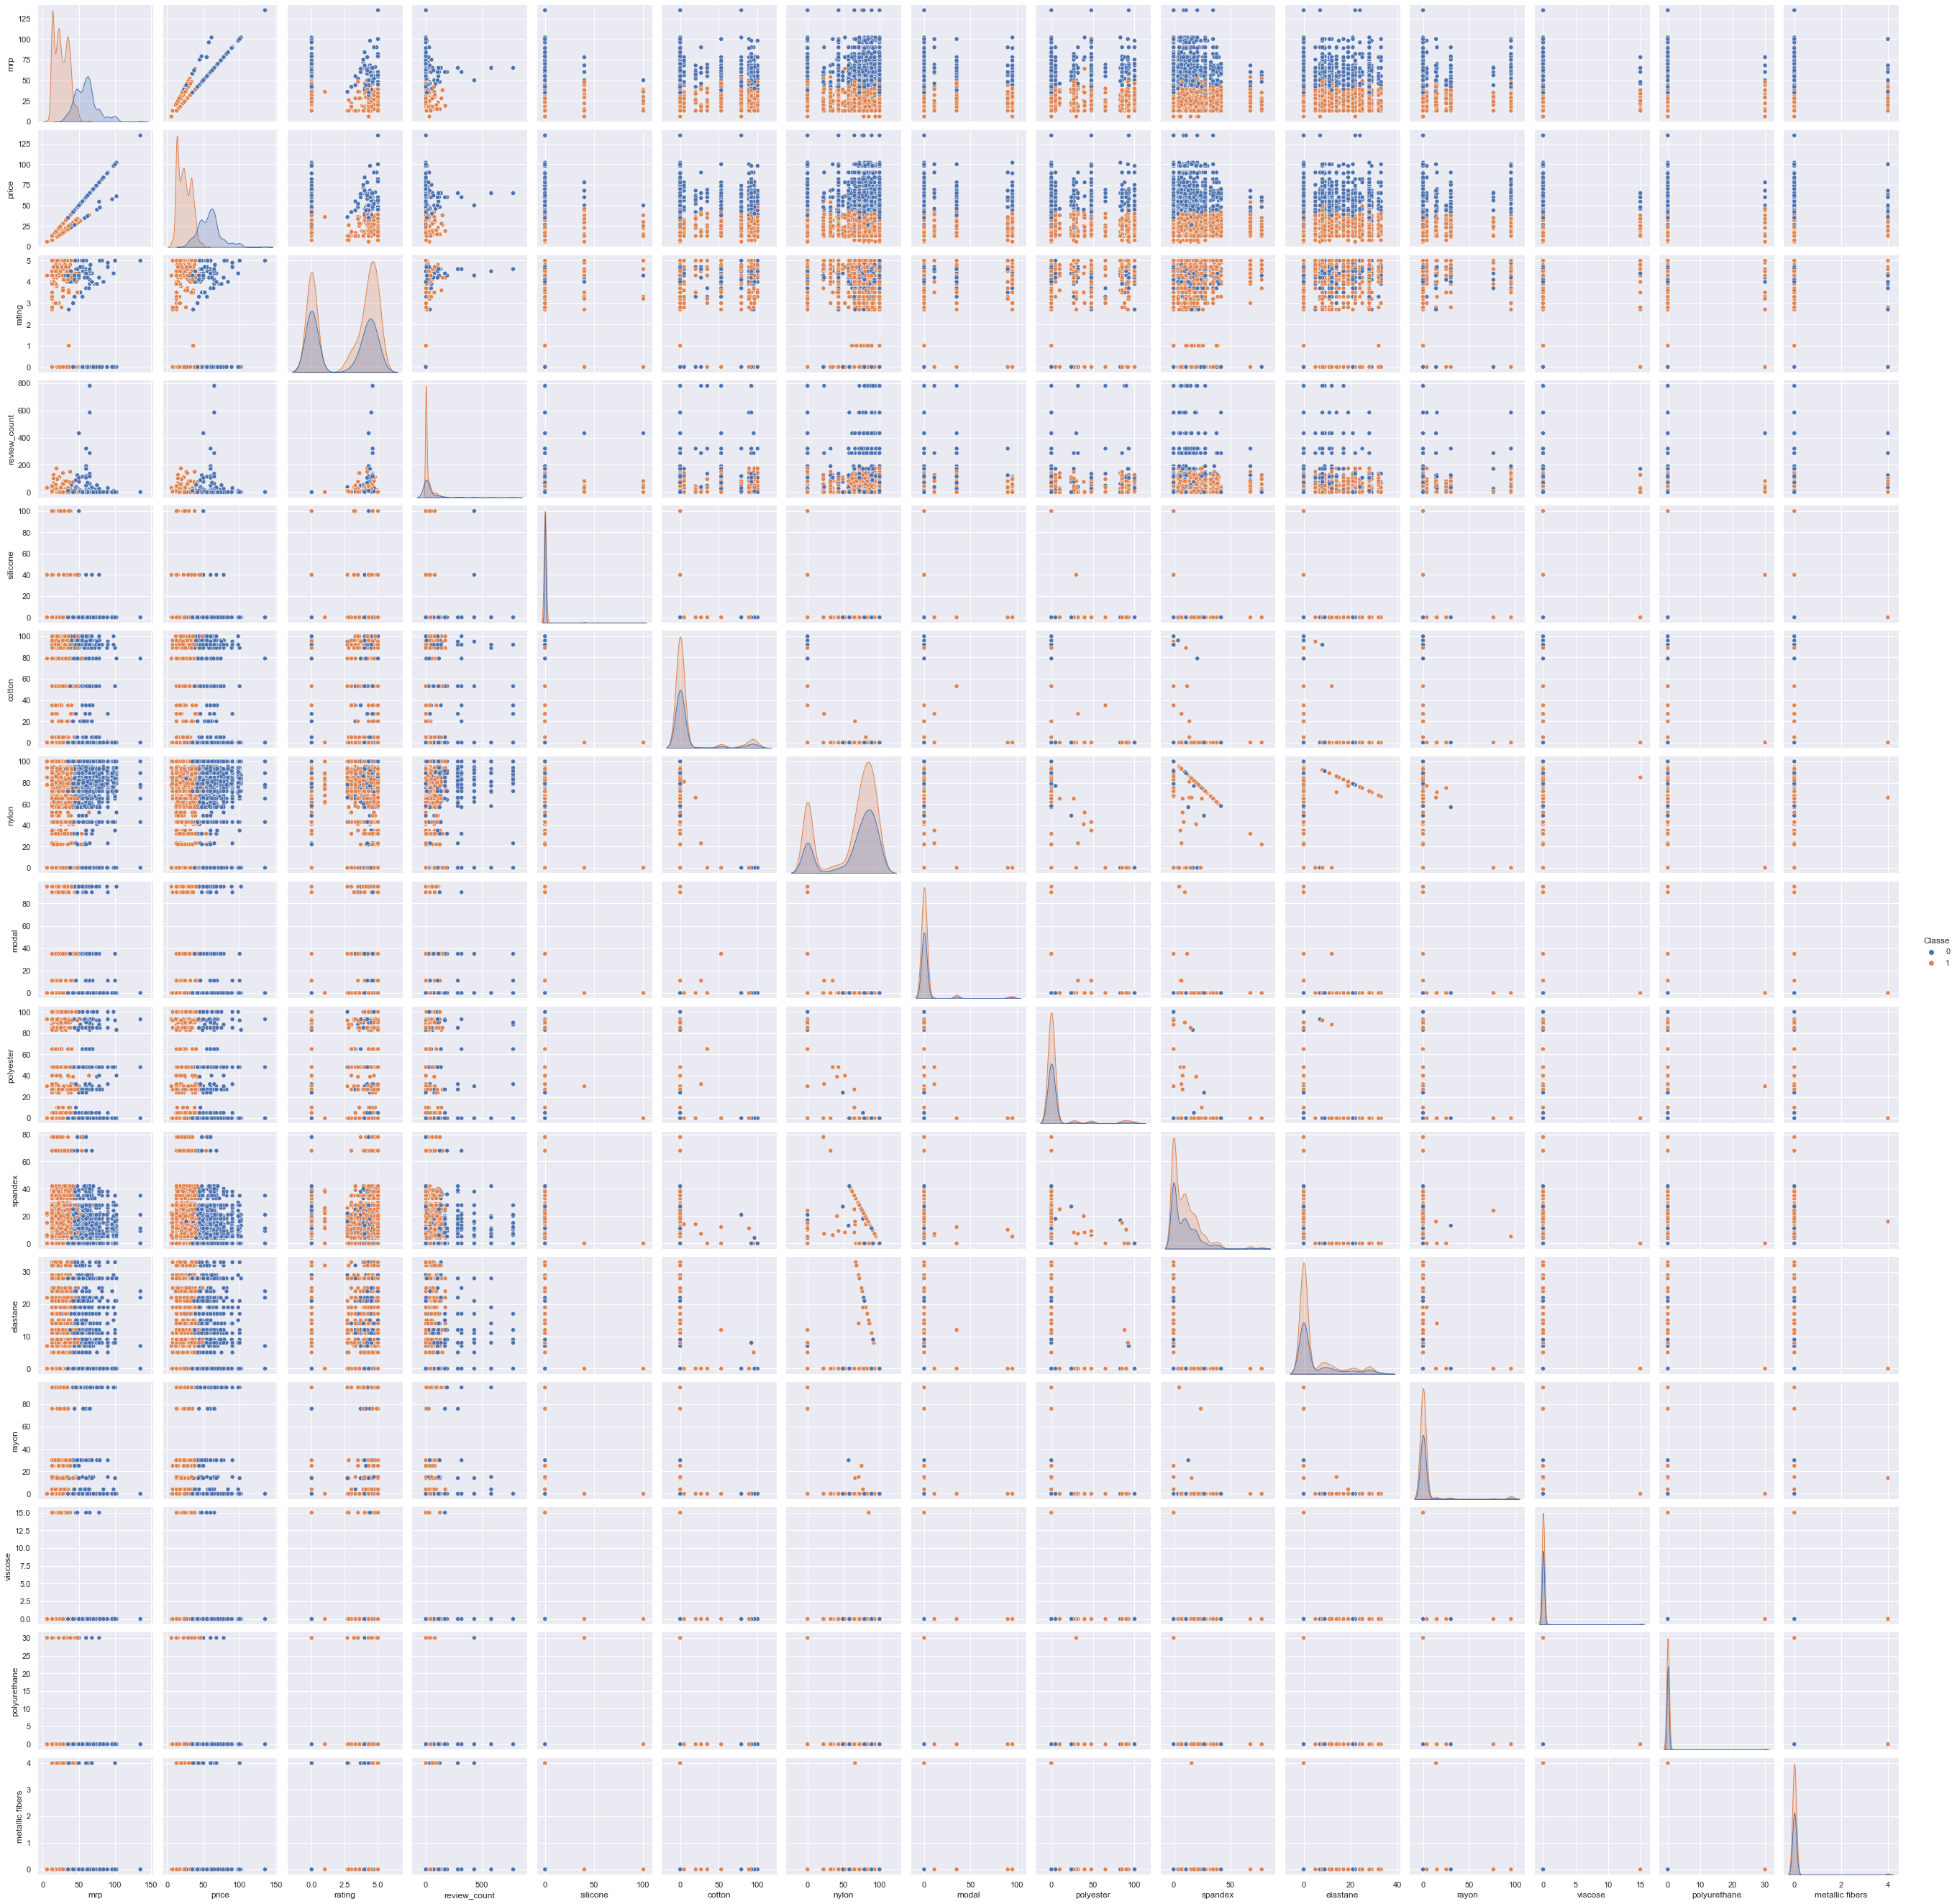

In [23]:
sns.pairplot(dataset, hue='Classe')

# Preprocessing

In [24]:
data=pd.get_dummies(dataset, columns=['product_category'], drop_first=True)
data

,mrp,price,rating,review_count,silicone,cotton,nylon,modal,polyester,spandex,elastane,rayon,viscose,polyurethane,metallic fibers,Classe,product_category_Bridal Lingerie,product_category_Panties,product_category_Sexy Lingerie,product_category_Skin-Tone Lingerie
0,23,23.0,0.0,0,0,0,77,0,5,18,0,0,0,0,0,1,0,0,1,0
1,78,78.0,0.0,0,0,0,80,0,0,20,0,0,0,0,0,0,0,0,1,0
2,15,15.0,4.3,33,0,0,93,0,0,7,0,0,0,0,0,1,0,0,0,1
3,20,20.0,0.0,0,0,0,88,0,0,12,0,0,0,0,0,1,0,1,0,0
4,29,29.0,0.0,0,0,0,91,0,0,9,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,28,16.8,0.0,0,0,53,0,35,0,0,12,0,0,0,0,1,0,0,0,0
5228,35,35.0,4.3,10,0,0,100,0,0,0,0,0,0,0,0,0,0,0,1,0
5229,13,13.0,4.3,44,0,0,72,0,0,0,28,0,0,0,0,1,0,0,0,1
5230,55,55.0,0.0,0,0,0,49,0,24,27,0,0,0,0,0,0,0,0,0,0


Split data to the matrice X and y

In [25]:
X = data.drop(["Classe"], axis=1)
y= data['Classe']

In [26]:
X.head()

,mrp,price,rating,review_count,silicone,cotton,nylon,modal,polyester,spandex,elastane,rayon,viscose,polyurethane,metallic fibers,product_category_Bridal Lingerie,product_category_Panties,product_category_Sexy Lingerie,product_category_Skin-Tone Lingerie
0,23,23.0,0.0,0,0,0,77,0,5,18,0,0,0,0,0,0,0,1,0
1,78,78.0,0.0,0,0,0,80,0,0,20,0,0,0,0,0,0,0,1,0
2,15,15.0,4.3,33,0,0,93,0,0,7,0,0,0,0,0,0,0,0,1
3,20,20.0,0.0,0,0,0,88,0,0,12,0,0,0,0,0,0,1,0,0
4,29,29.0,0.0,0,0,0,91,0,0,9,0,0,0,0,0,0,0,0,0


Division des données en traning et test set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4185, 19), (1047, 19), (4185,), (1047,))

In [28]:
y_test.value_counts()

1    675
0    372
Name: Classe, dtype: int64

Mettre les données en échelle

In [29]:
#features_scaling

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

X_train

array([[ 0.59143192,  0.68109647,  0.82199453, ..., -0.72351929,
        -0.32732684,  1.63927565],
       [-0.878455  , -0.79614659, -1.19745889, ..., -0.72351929,
         3.05505046, -0.61002553],
       [ 1.27737915,  1.37047657,  0.50071785, ..., -0.72351929,
        -0.32732684,  1.63927565],
       ...,
       [-0.78046254, -0.69766372,  0.91378787, ...,  1.38213316,
        -0.32732684, -0.61002553],
       [ 0.49343946,  0.5826136 , -1.19745889, ...,  1.38213316,
        -0.32732684, -0.61002553],
       [-0.29050023, -0.20524936,  0.77609786, ..., -0.72351929,
        -0.32732684, -0.61002553]])

# Entrainement du modèle

1.RandomForest

In [30]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train.ravel())
y_pred_rfc=rfc.predict(X_test)
print(rfc.score(X_test, y_test))
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

0.9923591212989494
Precision du modèle avec 100 arbres: 0.9924


In [31]:
from sklearn.metrics import confusion_matrix

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Positives(FP)', cm_rfc[0,1])
print('\n Faux Negatives(FN)', cm_rfc[1,0])

Matrice de confusion

 [[368   4]
 [  4 671]]

 Vrais Positives(VP) 368

 vrais Negatives(VN) 671

 Faux Positives(FP) 4

 Faux Negatives(FN) 4


<AxesSubplot:>

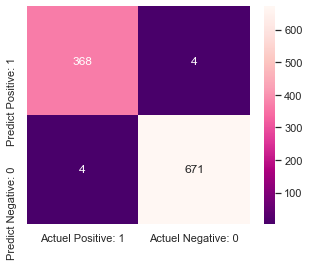

In [32]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='RdPu_r')

In [33]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

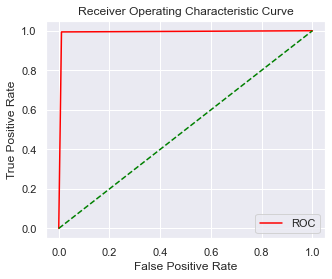

In [34]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [35]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       372
           1       0.99      0.99      0.99       675

    accuracy                           0.99      1047
   macro avg       0.99      0.99      0.99      1047
weighted avg       0.99      0.99      0.99      1047



In [36]:
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))

0.9923591212989494
0.9940740740740741
0.9916606929510156


2.Algorthme SVM

In [37]:
svc= SVC()
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)

print(svc.score(X_test, y_test))
print('précision du modèle support vector machine : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

0.9885386819484241
précision du modèle support vector machine : 0.9885


In [38]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Positives(FP)', cm_svm[0,1])
print('\n Faux Negatives(FN)', cm_svm[1,0])

Matrice de confusion

 [[360  12]
 [  0 675]]

 Vrais Positives(VP) 360

 vrais Negatives(VN) 675

 Faux Positives(FP) 12

 Faux Negatives(FN) 0


<AxesSubplot:>

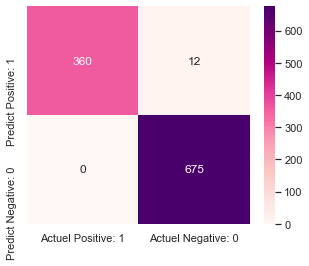

In [39]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='RdPu')

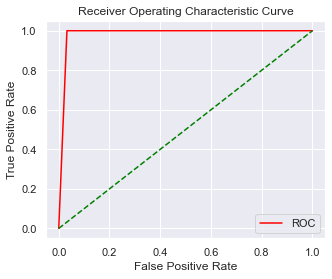

In [40]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [41]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       372
           1       0.98      1.00      0.99       675

    accuracy                           0.99      1047
   macro avg       0.99      0.98      0.99      1047
weighted avg       0.99      0.99      0.99      1047



In [42]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))

0.9885386819484241
0.9911894273127753
0.9838709677419355


3.Regression logistique

In [43]:
#Regression logistique
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log =log.predict(X_test)
print(log.score(X_test, y_test))
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test.ravel(), y_pred_log)))

0.9952244508118434
Précision du modèle Regression logistique: 0.9952


In [44]:
cm_log= confusion_matrix(y_test, y_pred_log)

print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Positives(FP)', cm_log[0,1])
print('\n Faux Negatives(FN)', cm_log[1,0])

Matrice de confusion

 [[367   5]
 [  0 675]]

 Vrais Positives(VP) 367

 vrais Negatives(VN) 675

 Faux Positives(FP) 5

 Faux Negatives(FN) 0


<AxesSubplot:>

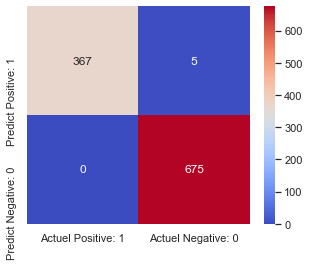

In [45]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='coolwarm')

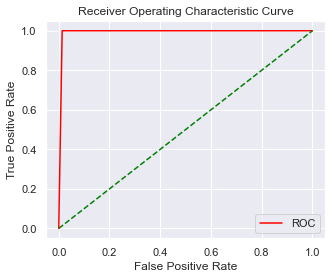

In [46]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [47]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       372
           1       0.99      1.00      1.00       675

    accuracy                           1.00      1047
   macro avg       1.00      0.99      0.99      1047
weighted avg       1.00      1.00      1.00      1047



In [48]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

0.9952244508118434
0.996309963099631
0.9932795698924731


# Cross_validation

1.random_Forest

In [49]:
kfold = KFold(n_splits =10, shuffle = True, random_state=42)

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_scores= cross_val_score(rfc_100, X, y.ravel(), cv = kfold)
#pourcentage de Validation croisée avec randomforest
print('validation croisée stratifiée avec RandomForest:\n\n{}'.format(rfc_scores))

validation croisée stratifiée avec RandomForest:

[0.99045802 0.9980916  0.99426386 0.99808795 0.99235182 0.99235182
 0.99235182 0.99426386 0.99235182 0.99426386]


2.SVM

In [50]:
kfold = KFold(n_splits =10, shuffle = True, random_state=42)

svc = SVC()
svc_scores= cross_val_score(svc, X, y.ravel(), cv = kfold)
#pourcentage de Validation croisée avec randomforest
print('validation croisée stratifiée avec support vector machine:\n\n{}'.format(svc_scores))

validation croisée stratifiée avec support vector machine:

[0.95229008 0.95038168 0.95219885 0.92351816 0.93116635 0.95028681
 0.95984704 0.96940727 0.93690249 0.94263862]


3.Regression Logistique

In [51]:
import warnings
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [52]:
kfold = KFold(n_splits =10, shuffle = True, random_state=42)

log= LogisticRegression(solver='lbfgs',max_iter=100 )
log_scores= cross_val_score(log, X, y.ravel(), cv = kfold)
#pourcentage de Validation croisée avec RL
print('validation croisée stratifiée avec Regression logistique:\n\n{}'.format(log_scores))

validation croisée stratifiée avec Regression logistique:

[0.99045802 0.99618321 0.99235182 0.99426386 0.98852772 0.99043977
 0.99617591 0.99043977 0.99043977 0.99043977]


# Equilibrage des données en appliquant deux techniques d'equilibrages(Suréchantillonage et souséchantillonage)

In [53]:
dataset['Classe'].value_counts(normalize=True)

1    0.642966
0    0.357034
Name: Classe, dtype: float64

Text(0.5, 1.0, 'Distribution de classes')

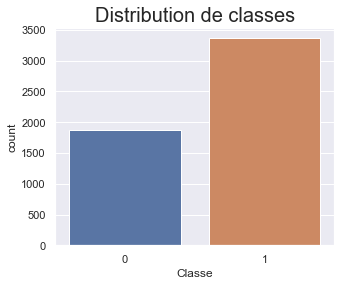

In [54]:
sns.countplot(x=dataset.Classe).set_title('Distribution de classes', size=20)

# 11. Suréchantillonnage avec RandomOversampling

In [55]:
#Spliter les données pour avoir la matrices X et y
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [56]:
#Spliter les données en données d'entrainementet de test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.2, random_state=0)
y_test.value_counts()

1    675
0    372
Name: Classe, dtype: int64

In [57]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
y_train_res.value_counts()

1    2689
0    2689
Name: Classe, dtype: int64

Text(0.5, 1.0, 'Distribution de classes')

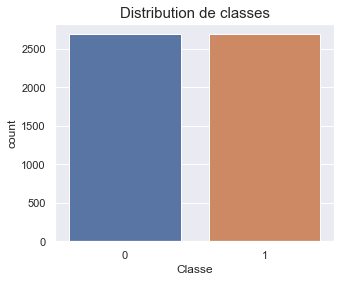

In [58]:
sns.countplot(x=y_train_res).set_title('Distribution de classes', size=15)

In [59]:
#features_scaling

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train_res)
X_test = scale.fit_transform(X_test)

X_train

array([[ 0.34700509,  0.42409721,  0.85824525, ..., -0.61819412,
        -0.37627587,  1.64047133],
       [-1.06293248, -0.98445003, -1.15209201, ..., -0.61819412,
         2.6576246 , -0.60958091],
       [ 1.00497595,  1.08141926,  0.53841887, ..., -0.61819412,
        -0.37627587,  1.64047133],
       ...,
       [ 0.15901341,  0.23629092, -1.15209201, ..., -0.61819412,
        -0.37627587,  1.64047133],
       [ 1.19296763,  1.26922556,  0.67548732, ..., -0.61819412,
        -0.37627587, -0.60958091],
       [ 1.47495514,  1.55093501, -1.15209201, ..., -0.61819412,
        -0.37627587, -0.60958091]])

# Entrainement du modèle RandomOversampling

1.RandomForest

In [60]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train_res.ravel())
y_pred_rfc=rfc.predict(X_test)
print(rfc.score(X_test, y_test))
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

0.938872970391595
Precision du modèle avec 100 arbres: 0.9389


In [61]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Positives(FP)', cm_rfc[0,1])
print('\n Faux Negatives(FN)', cm_rfc[1,0])

Matrice de confusion

 [[372   0]
 [ 64 611]]

 Vrais Positives(VP) 372

 vrais Negatives(VN) 611

 Faux Positives(FP) 0

 Faux Negatives(FN) 64


<AxesSubplot:>

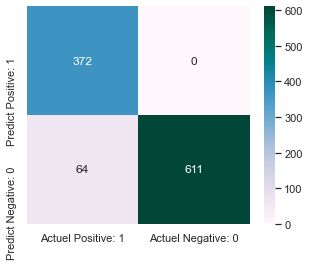

In [62]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='PuBuGn')

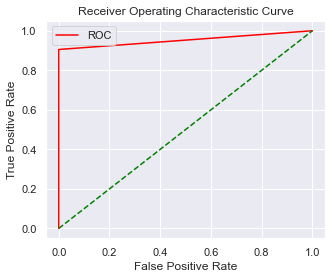

In [63]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [64]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       372
           1       1.00      0.91      0.95       675

    accuracy                           0.94      1047
   macro avg       0.93      0.95      0.94      1047
weighted avg       0.95      0.94      0.94      1047



In [65]:
print(classification_report_imbalanced(y_test, y_pred_rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      1.00      0.91      0.92      0.95      0.91       372
          1       1.00      0.91      1.00      0.95      0.95      0.90       675

avg / total       0.95      0.94      0.97      0.94      0.95      0.90      1047



In [66]:
from sklearn.metrics import precision_score, recall_score
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))
print(precision_score(y_test, y_pred_rfc))
print(recall_score(y_test, y_pred_rfc))

0.938872970391595
0.9502332814930015
0.9525925925925927
1.0
0.9051851851851852


In [67]:
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc)*100)

Accuracy 93.8872970391595
taux d'erreur 6.112702960840497
Sensitivity 100.0
Specitivity 90.51851851851852
Precision 85.3211009174312
Rappel 100.0
F1-score 92.07920792079209
MCC 87.88139537703576


2.Algorithme SVM

In [68]:
svc= SVC()
svc.fit(X_train, y_train_res.ravel())
y_pred_svm = svc.predict(X_test)

print(svc.score(X_test, y_test))
print('précision du modèle support vector machine : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

0.9169054441260746
précision du modèle support vector machine : 0.9169


In [69]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[372   0]
 [ 87 588]]

 Vrais Positives(VP) 372

 vrais Negatives(VN) 588

 Faux Negatives(FN) 0

 Faux Positives(FP) 87


<AxesSubplot:>

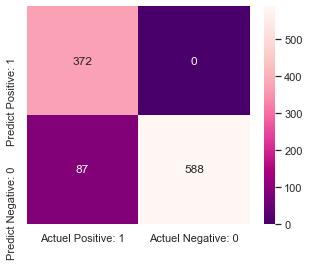

In [70]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='RdPu_r')

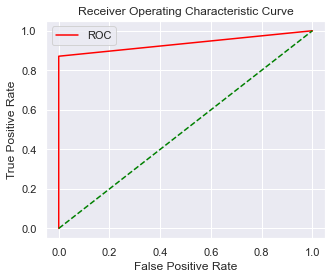

In [71]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [72]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       372
           1       1.00      0.87      0.93       675

    accuracy                           0.92      1047
   macro avg       0.91      0.94      0.91      1047
weighted avg       0.93      0.92      0.92      1047



In [73]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      1.00      0.87      0.90      0.93      0.88       372
          1       1.00      0.87      1.00      0.93      0.93      0.86       675

avg / total       0.93      0.92      0.95      0.92      0.93      0.87      1047



In [74]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))

0.9169054441260746
0.9311163895486936
0.9355555555555555


In [75]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 91.69054441260745
taux d'erreur 8.30945558739255
Sensitivity 100.0
Specitivity 87.1111111111111
Precision 81.04575163398692
Rappel 100.0
F1-score 89.53068592057761
MCC 84.02371972051553


3.Regression Logistique

In [76]:
#Regression logistique
log = LogisticRegression()
log.fit(X_train, y_train_res.ravel())
y_pred_log =log.predict(X_test)
print(log.score(X_test, y_test))
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test.ravel(), y_pred_log)))

0.9178605539637058
Précision du modèle Regression logistique: 0.9179


In [77]:
cm_log= confusion_matrix(y_test, y_pred_log)

print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n Faux Positives (FP)', cm_log[1,0])

Matrice de confusion

 [[372   0]
 [ 86 589]]

 Vrais Positives(VP) 372

 vrais Negatives(VN) 589

 Faux Negatives(FN) 0

 Faux Positives (FP) 86


<AxesSubplot:>

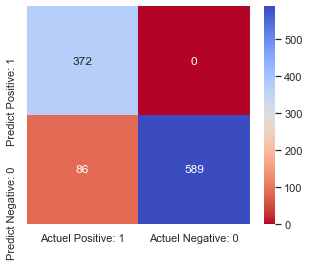

In [78]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='coolwarm_r')

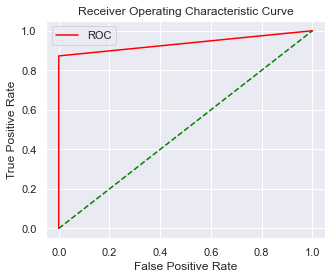

In [79]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [80]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       372
           1       1.00      0.87      0.93       675

    accuracy                           0.92      1047
   macro avg       0.91      0.94      0.91      1047
weighted avg       0.93      0.92      0.92      1047



In [81]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      1.00      0.87      0.90      0.93      0.88       372
          1       1.00      0.87      1.00      0.93      0.93      0.86       675

avg / total       0.93      0.92      0.95      0.92      0.93      0.87      1047



In [82]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

0.9178605539637058
0.9319620253164557
0.9362962962962963


In [83]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 91.78605539637059
taux d'erreur 8.213944603629416
Sensitivity 100.0
Specitivity 87.25925925925925
Precision 81.22270742358079
Rappel 100.0
F1-score 89.63855421686748
MCC 84.18689497073281


# 12.Techniques de suréchantillonage : Suréchantillonnage avec rétrécissement(shrinkage)

In [84]:
#Spliter les données pour avoir la matrices X et y
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [85]:
#Spliter les données en données d'entrainementet de test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.2, random_state=0)

In [86]:
y_train.value_counts()

1    2689
0    1496
Name: Classe, dtype: int64

In [87]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0, shrinkage = 0.1)

X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
y_train_res.value_counts()

1    2689
0    2689
Name: Classe, dtype: int64

Text(0.5, 1.0, 'Distribution de classes')

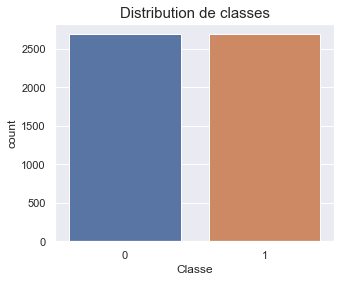

In [88]:
sns.countplot(x=y_train_res).set_title('Distribution de classes', size=15)

In [89]:
#features_scaling
scale = StandardScaler()
X_train = scale.fit_transform(X_train_res)
X_test = scale.fit_transform(X_test)

X_train

array([[ 0.35351233,  0.42435033,  0.85794851, ..., -0.61072869,
        -0.33133256,  1.76487015],
       [-1.06137888, -0.98441429, -1.15046773, ..., -0.61072869,
         3.01811573, -0.56661392],
       [ 1.0137949 ,  1.08177382,  0.53842775, ..., -0.61072869,
        -0.33133256,  1.76487015],
       ...,
       [ 0.07053409,  0.22538485, -1.23066893, ..., -0.61072869,
        -0.33133256, -0.56661392],
       [ 1.15528402,  1.24489162,  0.71619604, ..., -0.61072869,
        -0.33133256, -0.56661392],
       [ 1.39109922,  1.54384503, -1.17427082, ..., -0.61072869,
        -0.33133256, -0.56661392]])

# Entrainement du modèle avec Shrinkage

 1.RandomForest ou forêt aléatoire

In [90]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train_res.ravel())
y_pred_rfc=rfc.predict(X_test)
print(rfc.score(X_test, y_test))
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

0.4164278892072588
Precision du modèle avec 100 arbres: 0.4164


In [91]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN)', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[372   0]
 [611  64]]

 Vrais Positives(VP) 372

 vrais Negatives(VN) 64

 Faux Negatives(FN) 0

 Faux Positives(FP) 611


<AxesSubplot:>

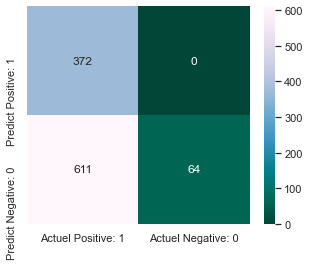

In [92]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='PuBuGn_r')

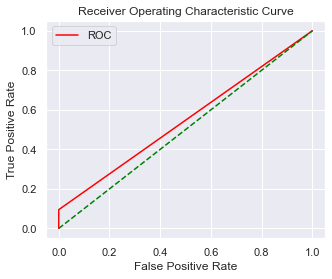

In [93]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [94]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.38      1.00      0.55       372
           1       1.00      0.09      0.17       675

    accuracy                           0.42      1047
   macro avg       0.69      0.55      0.36      1047
weighted avg       0.78      0.42      0.31      1047



In [95]:
print(classification_report_imbalanced(y_test, y_pred_rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.38      1.00      0.09      0.55      0.31      0.10       372
          1       1.00      0.09      1.00      0.17      0.31      0.09       675

avg / total       0.78      0.42      0.68      0.31      0.31      0.09      1047



In [96]:
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))

0.4164278892072588
0.17320703653585925
0.5474074074074075


In [97]:
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc)*100)

Accuracy 41.642788920725884
taux d'erreur 58.357211079274116
Sensitivity 100.0
Specitivity 9.481481481481481
Precision 37.843336724313325
Rappel 100.0
F1-score 54.90774907749078
MCC 18.94230440968165


2.Algorithme SVM

In [98]:
svc= SVC()
svc.fit(X_train, y_train_res.ravel())
y_pred_svm = svc.predict(X_test)

print(svc.score(X_test, y_test))
print('précision du modèle support vector machine : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

0.9197707736389685
précision du modèle support vector machine : 0.9198


In [99]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP) ', cm_svm[1,0])

Matrice de confusion

 [[371   1]
 [ 83 592]]

 Vrais Positives(VP) 371

 vrais Negatives(VN) 592

 Faux Negatives(FN) 1

 Faux Positives(FP)  83


<AxesSubplot:>

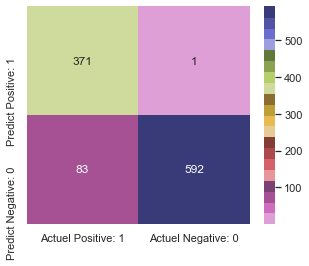

In [100]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20b_r')

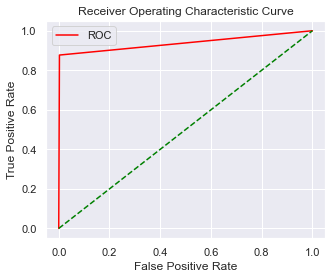

In [101]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [102]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       372
           1       1.00      0.88      0.93       675

    accuracy                           0.92      1047
   macro avg       0.91      0.94      0.92      1047
weighted avg       0.93      0.92      0.92      1047



In [103]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      1.00      0.88      0.90      0.94      0.89       372
          1       1.00      0.88      1.00      0.93      0.94      0.86       675

avg / total       0.93      0.92      0.95      0.92      0.94      0.87      1047



In [104]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))

0.9197707736389685
0.9337539432176657
0.9371744324970132


In [105]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 91.97707736389685
taux d'erreur 8.022922636103152
Sensitivity 99.73118279569893
Specitivity 87.70370370370371
Precision 81.71806167400881
Rappel 99.73118279569893
F1-score 89.83050847457626
MCC 84.44089617694316


3. Regresssion Logistique

In [106]:
#Regression logistique
log = LogisticRegression()
log.fit(X_train, y_train_res)
y_pred_log =log.predict(X_test)
print(log.score(X_test, y_test))
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test.ravel(), y_pred_log)))

0.9111747851002865
Précision du modèle Regression logistique: 0.9112


In [107]:
cm_log= confusion_matrix(y_test, y_pred_log)

print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[372   0]
 [ 93 582]]

 Vrais Positives(VP) 372

 vrais Negatives(VN) 582

 Faux Negatives(FN) 0

 Faux Positives(FP) 93


<AxesSubplot:>

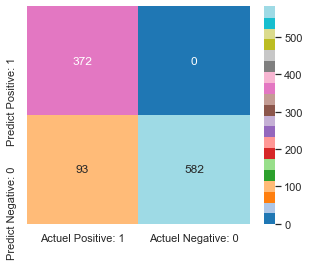

In [108]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20')

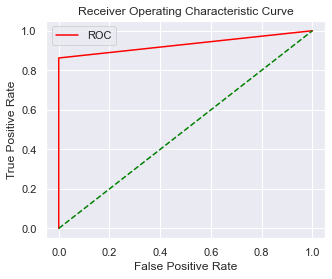

In [109]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [110]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       372
           1       1.00      0.86      0.93       675

    accuracy                           0.91      1047
   macro avg       0.90      0.93      0.91      1047
weighted avg       0.93      0.91      0.91      1047



In [111]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.80      1.00      0.86      0.89      0.93      0.87       372
          1       1.00      0.86      1.00      0.93      0.93      0.85       675

avg / total       0.93      0.91      0.95      0.91      0.93      0.86      1047



In [112]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

0.9111747851002865
0.9260143198090692
0.9311111111111111


In [113]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 91.11747851002865
taux d'erreur 8.882521489971348
Sensitivity 100.0
Specitivity 86.22222222222223
Precision 80.0
Rappel 100.0
F1-score 88.8888888888889
MCC 83.05286134611967


# 13.Suréchantillonage avec smote

In [114]:
#Spliter les données pour avoir la matrices X et y
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [115]:
#Spliter les données en données d'entrainementet de test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.2, random_state=0)

In [116]:
y_train.value_counts()

1    2689
0    1496
Name: Classe, dtype: int64

In [117]:
#Application de la methode smote sur les données d'entrainement
from imblearn.over_sampling import SMOTE

smote =SMOTE(random_state=0)
X_train_res, y_train_res= smote.fit_resample(X_train, y_train)
y_train_res.value_counts()

1    2689
0    2689
Name: Classe, dtype: int64

Text(0.5, 1.0, 'Distribution de classes')

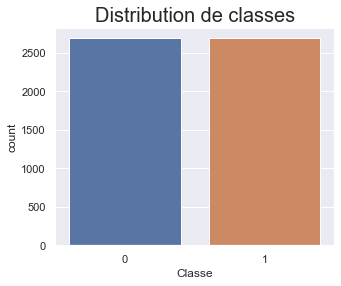

In [118]:
sns.countplot(x=y_train_res).set_title('Distribution de classes', size=20)

In [119]:
#features_scaling
scale = StandardScaler()
X_train = scale.fit_transform(X_train_res)
X_test = scale.fit_transform(X_test)

X_train

array([[ 0.33601433,  0.41130162,  0.87404472, ..., -0.60728587,
        -0.32015781,  1.82964893],
       [-1.06200907, -0.98376849, -1.15552359, ..., -0.60728587,
         3.12345962, -0.54655294],
       [ 0.98842525,  1.06233434,  0.55115886, ..., -0.60728587,
        -0.32015781,  1.82964893],
       ...,
       [ 1.03502603,  1.10883667,  0.96629783, ..., -0.60728587,
        -0.32015781, -0.54655294],
       [ 0.89522369,  0.98811349, -1.15552359, ..., -0.60728587,
        -0.32015781, -0.54655294],
       [ 1.64083617,  0.62521237, -1.15552359, ..., -0.60728587,
        -0.32015781, -0.54655294]])

# Entrainement du modèle avec smote

1.RandomForest ou forêt aléatoire

In [120]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train_res.ravel())
y_pred_rfc=rfc.predict(X_test)
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

Precision du modèle avec 100 arbres: 0.9188


In [121]:
from sklearn.metrics import confusion_matrix

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN)', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[372   0]
 [ 85 590]]

 Vrais Positives(VP) 372

 vrais Negatives(VN) 590

 Faux Negatives(FN) 0

 Faux Positives(FP) 85


<AxesSubplot:>

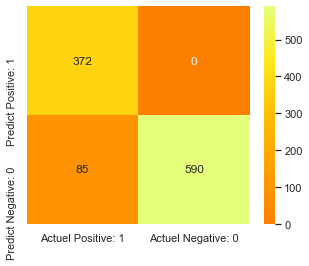

In [122]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='Wistia_r')

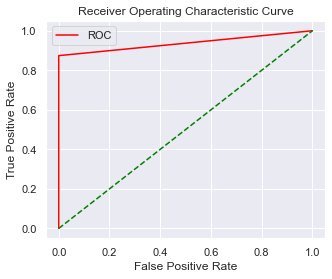

In [123]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [124]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       372
           1       1.00      0.87      0.93       675

    accuracy                           0.92      1047
   macro avg       0.91      0.94      0.92      1047
weighted avg       0.93      0.92      0.92      1047



In [125]:
print(classification_report_imbalanced(y_test, y_pred_rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      1.00      0.87      0.90      0.93      0.89       372
          1       1.00      0.87      1.00      0.93      0.93      0.86       675

avg / total       0.93      0.92      0.96      0.92      0.93      0.87      1047



In [126]:
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))

0.9188156638013372
0.9328063241106719
0.9370370370370371


In [127]:
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc)*100)

Accuracy 91.88156638013372
taux d'erreur 8.118433619866284
Sensitivity 100.0
Specitivity 87.4074074074074
Precision 81.4004376367615
Rappel 100.0
F1-score 89.74668275030156
MCC 84.3504666001183


2.Algorthme SVM

In [128]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(X_train, y_train_res)
y_pred_svm = svc.predict(X_test)

print(svc.score(X_test, y_test))
print('précision du modèle support vector machine : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

0.9235912129894938
précision du modèle support vector machine : 0.9236


In [129]:
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test, y_pred_svm)
print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[371   1]
 [ 79 596]]

 Vrais Positives(VP) 371

 vrais Negatives(VN) 596

 Faux Negatives(FN) 1

 Faux Positives(FP) 79


<AxesSubplot:>

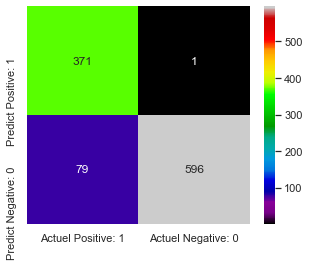

In [130]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='nipy_spectral')

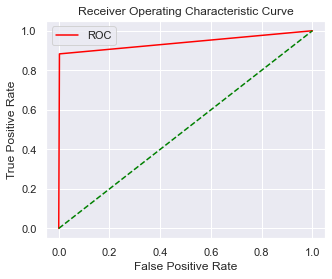

In [131]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [132]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       372
           1       1.00      0.88      0.94       675

    accuracy                           0.92      1047
   macro avg       0.91      0.94      0.92      1047
weighted avg       0.94      0.92      0.92      1047



In [133]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      1.00      0.88      0.90      0.94      0.89       372
          1       1.00      0.88      1.00      0.94      0.94      0.87       675

avg / total       0.94      0.92      0.96      0.92      0.94      0.88      1047



In [134]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))


0.9235912129894938
0.9371069182389937
0.9401373954599761


In [135]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 92.35912129894938
taux d'erreur 7.640878701050621
Sensitivity 99.73118279569893
Specitivity 88.29629629629629
Precision 82.44444444444444
Rappel 99.73118279569893
F1-score 90.2676399026764
MCC 85.10365232005206


3.Regression logistique

In [136]:
#Regression logistique
log = LogisticRegression()
log.fit(X_train, y_train_res)
y_pred_log =log.predict(X_test)
print(log.score(X_test, y_test))
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test.ravel(), y_pred_log)))

0.9169054441260746
Précision du modèle Regression logistique: 0.9169


In [137]:
cm_log= confusion_matrix(y_test, y_pred_log)

print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[372   0]
 [ 87 588]]

 Vrais Positives(VP) 372

 vrais Negatives(VN) 588

 Faux Negatives(FN) 0

 Faux Positives(FP) 87


<AxesSubplot:>

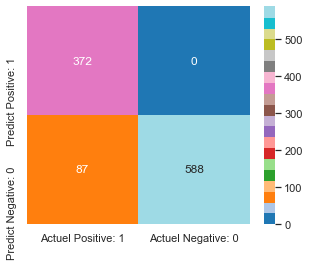

In [138]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20')

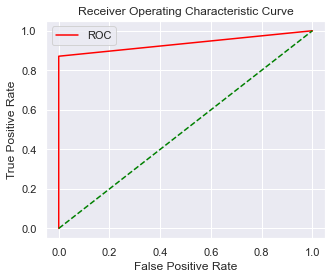

In [139]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [140]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       372
           1       1.00      0.87      0.93       675

    accuracy                           0.92      1047
   macro avg       0.91      0.94      0.91      1047
weighted avg       0.93      0.92      0.92      1047



In [141]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      1.00      0.87      0.90      0.93      0.88       372
          1       1.00      0.87      1.00      0.93      0.93      0.86       675

avg / total       0.93      0.92      0.95      0.92      0.93      0.87      1047



In [142]:
from sklearn.metrics import recall_score
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))
print(recall_score(y_test, y_pred_log))

0.9169054441260746
0.9311163895486936
0.9355555555555555
0.8711111111111111


In [143]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 91.69054441260745
taux d'erreur 8.30945558739255
Sensitivity 100.0
Specitivity 87.1111111111111
Precision 81.04575163398692
Rappel 100.0
F1-score 89.53068592057761
MCC 84.02371972051553


# 21.Techniques de souséchantillonage : Randomundersampling

In [144]:
#Spliter les données pour avoir la matrices X et y
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [145]:
#Spliter les données en données d'entrainementet de test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.2, random_state=0)

In [146]:
y_train.value_counts()

1    2689
0    1496
Name: Classe, dtype: int64

In [147]:
from imblearn.under_sampling import RandomUnderSampler
ran = RandomUnderSampler()

X_train_res, y_train_res = ran.fit_resample(X_train, y_train)
y_train_res.value_counts()

1    1496
0    1496
Name: Classe, dtype: int64

Text(0.5, 1.0, 'Distribution de classes')

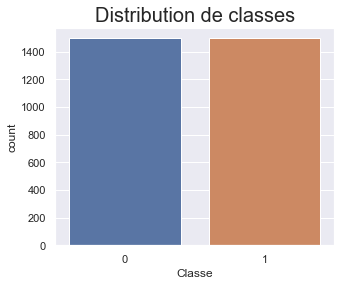

In [148]:
sns.countplot(x=y_train_res).set_title('Distribution de classes', size=20)

In [149]:
#features_scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train_res)
X_test = sc.fit_transform(X_test)
X_train

array([[ 0.33019382,  0.41401533,  0.84579005, ..., -0.61288839,
        -0.37274892,  1.64686332],
       [ 0.9847683 ,  1.06855044,  0.52532137, ..., -0.61288839,
        -0.37274892,  1.64686332],
       [ 0.70423638, -0.29662278,  0.75422757, ..., -0.61288839,
        -0.37274892, -0.60721493],
       ...,
       [-1.39975302, -1.31582745,  0.80000881, ...,  1.63161843,
        -0.37274892, -0.60721493],
       [-0.93219982, -0.84830237, -1.16858452, ..., -0.61288839,
         2.68277101, -0.60721493],
       [ 0.14317254, -0.4181793 ,  0.66266509, ..., -0.61288839,
        -0.37274892,  1.64686332]])

# Entrainement du modèles

1. RandomForest

In [150]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, y_train_res.ravel())

y_pred_rfc100 = rfc.predict(X_test)

print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc100)))

Precision du modèle avec 100 arbres: 0.9188


In [151]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc100)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux  Negatives(FN)', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[372   0]
 [ 85 590]]

 Vrais Positives(VP) 372

 vrais Negatives(VN) 590

 Faux  Negatives(FN) 0

 Faux Positives(FP) 85


<AxesSubplot:>

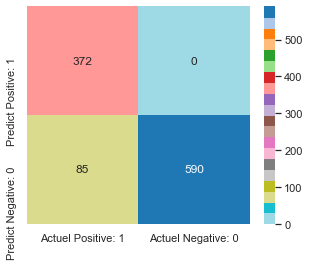

In [152]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20_r')

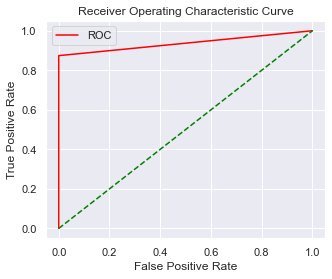

In [153]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc100)
plot_roc_curve(fper, tper)

In [154]:
print(classification_report(y_test, y_pred_rfc100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       372
           1       1.00      0.87      0.93       675

    accuracy                           0.92      1047
   macro avg       0.91      0.94      0.92      1047
weighted avg       0.93      0.92      0.92      1047



In [155]:
print(classification_report_imbalanced(y_test, y_pred_rfc100))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      1.00      0.87      0.90      0.93      0.89       372
          1       1.00      0.87      1.00      0.93      0.93      0.86       675

avg / total       0.93      0.92      0.96      0.92      0.93      0.87      1047



In [156]:
print(accuracy_score(y_test, y_pred_rfc100))
print(f1_score(y_test, y_pred_rfc100))
print(roc_auc_score(y_test, y_pred_rfc100))

0.9188156638013372
0.9328063241106719
0.9370370370370371


In [157]:
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc100)*100)

Accuracy 91.88156638013372
taux d'erreur 8.118433619866284
Sensitivity 100.0
Specitivity 87.4074074074074
Precision 81.4004376367615
Rappel 100.0
F1-score 89.74668275030156
MCC 84.3504666001183


2. Algorithme SVM

In [158]:
svc= SVC()
svc.fit(X_train, y_train_res.ravel())
y_pred_svm= svc.predict(X_test)
print('précision du modèle : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

précision du modèle : 0.9140


In [159]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[372   0]
 [ 90 585]]

 Vrais Positives(VP) 372

 vrais Negatives(VN) 585

 Faux Negatives(FN) 0

 Faux Positives(FP) 90


<AxesSubplot:>

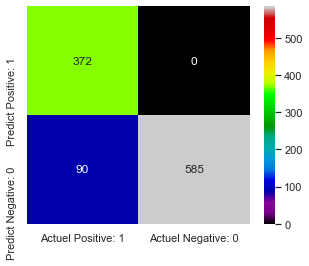

In [160]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='nipy_spectral')

In [161]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       372
           1       1.00      0.87      0.93       675

    accuracy                           0.91      1047
   macro avg       0.90      0.93      0.91      1047
weighted avg       0.93      0.91      0.92      1047



In [162]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      1.00      0.87      0.89      0.93      0.88       372
          1       1.00      0.87      1.00      0.93      0.93      0.86       675

avg / total       0.93      0.91      0.95      0.92      0.93      0.86      1047



In [163]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 91.40401146131805
taux d'erreur 8.595988538681947
Sensitivity 100.0
Specitivity 86.66666666666667
Precision 80.51948051948052
Rappel 100.0
F1-score 89.20863309352518
MCC 83.53654875774423


3.regression logistique

In [164]:
#Regression logistique 
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train_res)
y_pred_log = log.predict(X_test)
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test, y_pred_log)))

Précision du modèle Regression logistique: 0.9112


In [165]:
cm_log = confusion_matrix(y_test, y_pred_log)
print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[372   0]
 [ 93 582]]

 Vrais Positives(VP) 372

 vrais Negatives(VN) 582

 Faux Negatives(FN) 0

 Faux Positives(FP) 93


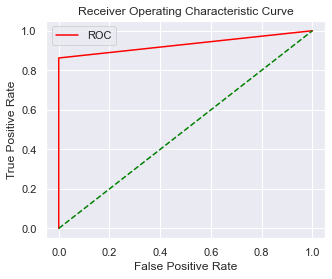

In [166]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper) 

In [167]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       372
           1       1.00      0.86      0.93       675

    accuracy                           0.91      1047
   macro avg       0.90      0.93      0.91      1047
weighted avg       0.93      0.91      0.91      1047



In [168]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.80      1.00      0.86      0.89      0.93      0.87       372
          1       1.00      0.86      1.00      0.93      0.93      0.85       675

avg / total       0.93      0.91      0.95      0.91      0.93      0.86      1047



In [169]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

0.9111747851002865
0.9260143198090692
0.9311111111111111


In [170]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 91.11747851002865
taux d'erreur 8.882521489971348
Sensitivity 100.0
Specitivity 86.22222222222223
Precision 80.0
Rappel 100.0
F1-score 88.8888888888889
MCC 83.05286134611967


# 22 Sous-échantillonnage à l'aide de K-Means

In [234]:
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [235]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.2, random_state=0)
X_train.shape

(4185, 19)

In [236]:
from imblearn.under_sampling import ClusterCentroids
clus = ClusterCentroids(random_state=0)

X_train_clus, y_train_clus=clus.fit_resample(X_train, y_train)
y_train_clus.value_counts()

1    1496
0    1496
Name: Classe, dtype: int64

In [237]:
#features_scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train_clus)
X_test = sc.fit_transform(X_test)

# Entrainement du modèles

1.RandomForest ou forêt aléatoire

In [238]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train_clus.ravel())
y_pred_rfc=rfc.predict(X_test)
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

Precision du modèle avec 100 arbres: 0.9322


In [239]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN)', cm_rfc[0,1])
print('\n FauxPositives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[371   1]
 [ 70 605]]

 Vrais Positives(VP) 371

 vrais Negatives(VN) 605

 Faux Negatives(FN) 1

 FauxPositives(FP) 70


<AxesSubplot:>

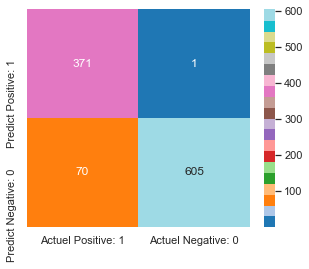

In [240]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20')

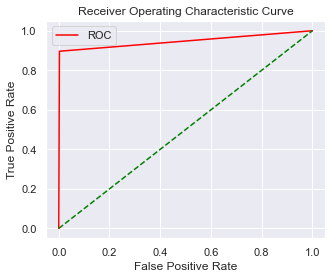

In [241]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [242]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       372
           1       1.00      0.90      0.94       675

    accuracy                           0.93      1047
   macro avg       0.92      0.95      0.93      1047
weighted avg       0.94      0.93      0.93      1047



In [243]:
print(classification_report_imbalanced(y_test, y_pred_rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      1.00      0.90      0.91      0.95      0.90       372
          1       1.00      0.90      1.00      0.94      0.95      0.88       675

avg / total       0.94      0.93      0.96      0.93      0.95      0.89      1047



In [244]:
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))

0.9321872015281757
0.9445745511319282
0.9468040621266428


In [245]:
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc)*100)

Accuracy 93.21872015281757
taux d'erreur 6.781279847182425
Sensitivity 99.73118279569893
Specitivity 89.62962962962962
Precision 84.12698412698413
Rappel 99.73118279569893
F1-score 91.2669126691267
MCC 86.61933756286166


2.Algorithme SVM

In [183]:
svc= SVC()
svc.fit(X_train, y_train_clus.ravel())
y_pred_svm= svc.predict(X_test)
print('précision du modèle : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

précision du modèle : 0.9064


In [184]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[372   0]
 [ 98 577]]

 Vrais Positives(VP) 372

 vrais Negatives(VN) 577

 Faux Negatives(FN) 0

 Faux Positives(FP) 98


<AxesSubplot:>

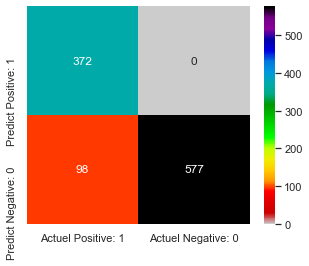

In [185]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='nipy_spectral_r')

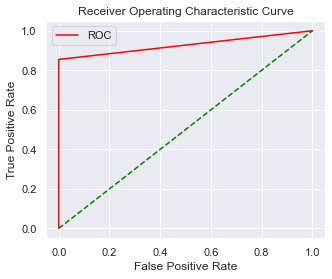

In [186]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [187]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       372
           1       1.00      0.85      0.92       675

    accuracy                           0.91      1047
   macro avg       0.90      0.93      0.90      1047
weighted avg       0.93      0.91      0.91      1047



In [188]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.79      1.00      0.85      0.88      0.92      0.87       372
          1       1.00      0.85      1.00      0.92      0.92      0.84       675

avg / total       0.93      0.91      0.95      0.91      0.92      0.85      1047



In [189]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))

0.9063992359121299
0.9217252396166133
0.9274074074074075


In [190]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 90.63992359121299
taux d'erreur 9.36007640878701
Sensitivity 100.0
Specitivity 85.48148148148148
Precision 79.14893617021276
Rappel 100.0
F1-score 88.36104513064133
MCC 82.2542905963756


3. Regression Logistique

In [191]:
#Regression logistique 
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train_res)
y_pred_log = log.predict(X_test)
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test, y_pred_log)))

Précision du modèle Regression logistique: 0.9026


In [192]:
cm_log = confusion_matrix(y_test, y_pred_log)
print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN) ', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[372   0]
 [102 573]]

 Vrais Positives(VP) 372

 vrais Negatives(VN) 573

 Faux Negatives(FN)  0

 Faux Positives(FP) 102


<AxesSubplot:>

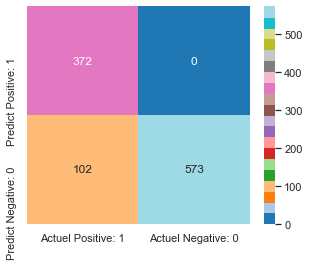

In [193]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20')

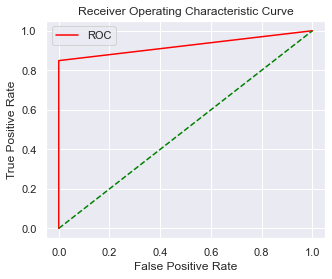

In [194]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [195]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       372
           1       1.00      0.85      0.92       675

    accuracy                           0.90      1047
   macro avg       0.89      0.92      0.90      1047
weighted avg       0.92      0.90      0.90      1047



In [196]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.78      1.00      0.85      0.88      0.92      0.86       372
          1       1.00      0.85      1.00      0.92      0.92      0.84       675

avg / total       0.92      0.90      0.95      0.90      0.92      0.85      1047



In [197]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

0.9025787965616046
0.9182692307692308
0.9244444444444444


In [198]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 90.25787965616045
taux d'erreur 9.742120343839542
Sensitivity 100.0
Specitivity 84.88888888888889
Precision 78.48101265822784
Rappel 100.0
F1-score 87.94326241134752
MCC 81.62209237352216


# 23.Souséchantillonage avec NearMiss

In [199]:
#Spliter les données pour avoir la matrices X et y
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [200]:
#Spliter les données en données d'entrainementet de test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.2, random_state=0)

In [201]:
y_train.value_counts()

1    2689
0    1496
Name: Classe, dtype: int64

In [202]:
from imblearn.under_sampling import NearMiss

nearmiss = NearMiss()

X_train_miss, y_train_miss= nearmiss.fit_resample(X_train, y_train)

y_train_miss.value_counts()

1    1496
0    1496
Name: Classe, dtype: int64

Text(0.5, 1.0, 'Equilibrages des classes')

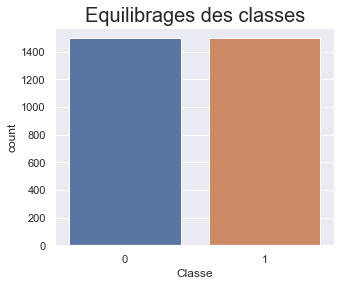

In [203]:
sns.countplot(x=y_train_miss).set_title('Equilibrages des classes', size=20)

In [204]:
#features_scaling

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train_miss)
X_test = scale.fit_transform(X_test)

X_train

array([[ 0.22909318,  0.33347252,  0.93431286, ..., -0.60773052,
        -0.38657852,  1.80277564],
       [ 0.97530275,  1.06624075,  0.62223451, ..., -0.60773052,
        -0.38657852,  1.80277564],
       [ 0.65549865, -0.46210441,  0.84514762, ..., -0.60773052,
        -0.38657852, -0.5547002 ],
       ...,
       [-1.47652869, -1.34142629,  1.20180858, ...,  1.64546615,
        -0.38657852, -0.5547002 ],
       [-1.05012322, -0.92270159,  1.20180858, ..., -0.60773052,
        -0.38657852,  1.80277564],
       [-1.21002527, -1.07972335,  0.88973024, ...,  1.64546615,
        -0.38657852, -0.5547002 ]])

# Entrainement du modèle avec NearMiss

1.RandomForest ou forêt aléatoire

In [205]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train_miss)
y_pred_rfc=rfc.predict(X_test)
print(rfc.score(X_test, y_test))
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

0.8510028653295129
Precision du modèle avec 100 arbres: 0.8510


In [206]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN)', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[372   0]
 [156 519]]

 Vrais Positives(VP) 372

 vrais Negatives(VN) 519

 Faux Negatives(FN) 0

 Faux Positives(FP) 156


<AxesSubplot:>

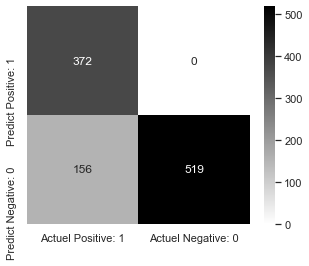

In [207]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='gist_yarg')

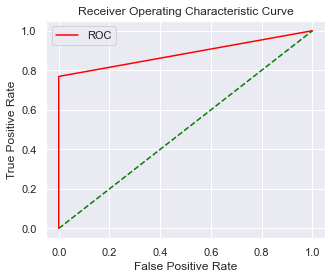

In [208]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [209]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83       372
           1       1.00      0.77      0.87       675

    accuracy                           0.85      1047
   macro avg       0.85      0.88      0.85      1047
weighted avg       0.90      0.85      0.85      1047



In [210]:
print(classification_report_imbalanced(y_test, y_pred_rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.70      1.00      0.77      0.83      0.88      0.79       372
          1       1.00      0.77      1.00      0.87      0.88      0.75       675

avg / total       0.90      0.85      0.92      0.85      0.88      0.76      1047



In [211]:
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))

0.8510028653295129
0.8693467336683417
0.8844444444444444


In [212]:
from sklearn.metrics import matthews_corrcoef
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc)*100)

Accuracy 85.10028653295129
taux d'erreur 14.899713467048711
Sensitivity 100.0
Specitivity 76.88888888888889
Precision 70.45454545454545
Rappel 100.0
F1-score 82.66666666666667
MCC 73.60143828195017


2.Algorthme SVM

In [213]:
svc= SVC()
svc.fit(X_train, y_train_miss)
y_pred_svm = svc.predict(X_test)

print(rfc.score(X_test, y_test))
print('précision du modèle support vector machine : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

0.8510028653295129
précision du modèle support vector machine : 0.8701


In [214]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[372   0]
 [136 539]]

 Vrais Positives(VP) 372

 vrais Negatives(VN) 539

 Faux Negatives(FN) 0

 Faux Positives(FP) 136


<AxesSubplot:>

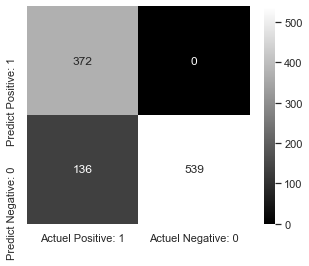

In [215]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='gray')

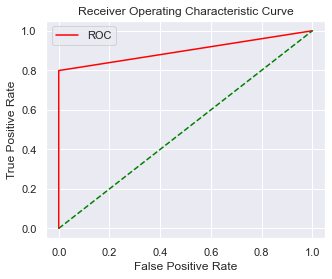

In [216]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [217]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85       372
           1       1.00      0.80      0.89       675

    accuracy                           0.87      1047
   macro avg       0.87      0.90      0.87      1047
weighted avg       0.90      0.87      0.87      1047



In [218]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.73      1.00      0.80      0.85      0.89      0.81       372
          1       1.00      0.80      1.00      0.89      0.89      0.78       675

avg / total       0.90      0.87      0.93      0.87      0.89      0.79      1047



In [219]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))

0.8701050620821394
0.8879736408566722
0.8992592592592592


In [220]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 87.01050620821394
taux d'erreur 12.989493791786055
Sensitivity 100.0
Specitivity 79.85185185185185
Precision 73.22834645669292
Rappel 100.0
F1-score 84.54545454545455
MCC 76.46841879243955


3.Regression logistique

In [221]:
#Regression logistique
log = LogisticRegression()
log.fit(X_train, y_train_miss)
y_pred_log =log.predict(X_test)
print(log.score(X_test, y_test))
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test.ravel(), y_pred_log)))

0.8586437440305635
Précision du modèle Regression logistique: 0.8586


In [222]:
cm_log= confusion_matrix(y_test, y_pred_log)

print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[372   0]
 [148 527]]

 Vrais Positives(VP) 372

 vrais Negatives(VN) 527

 Faux Negatives(FN) 0

 Faux Positives(FP) 148


<AxesSubplot:>

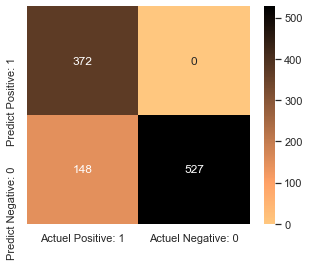

In [223]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='copper_r')

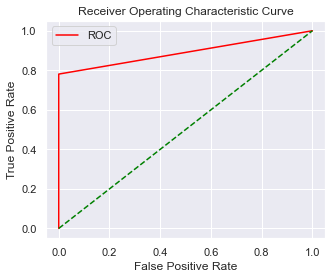

In [224]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [225]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.72      1.00      0.83       372
           1       1.00      0.78      0.88       675

    accuracy                           0.86      1047
   macro avg       0.86      0.89      0.86      1047
weighted avg       0.90      0.86      0.86      1047



In [226]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.72      1.00      0.78      0.83      0.88      0.80       372
          1       1.00      0.78      1.00      0.88      0.88      0.76       675

avg / total       0.90      0.86      0.92      0.86      0.88      0.78      1047



In [227]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

0.8586437440305635
0.8768718801996672
0.8903703703703704


In [228]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec)/(precision+rec)
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 85.86437440305636
taux d'erreur 14.13562559694365
Sensitivity 100.0
Specitivity 78.07407407407408
Precision 71.53846153846153
Rappel 100.0
F1-score 83.40807174887892
MCC 74.73485897022316
